My understanding is that the goal is to identify "actionable" mutations/amplifications in the gene to impact decision making on treatment of neuroblastomia instead of simply considering the gene profile only.


On average, tumors from relapsed patients had more genetic mutations that are known to recur in other types of cancer. These tumors also had more mutations in genes that could potentially be treated with existing drugs.


The goal is to identify mutations that can be targeted with specific therapies, which could guide the development of more personalized treatments for patients.

---------some dataanalysis in s002------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_excel(r'C:\Users\Advaitha\Desktop\projects\GENOME\pgen.1006501.s002.xlsx')


c:\Users\Advaitha\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [11]:
print(df.shape)


(1607, 26)


In [9]:
print(df.isnull().sum())

Patient.ID                     0
Sample.ID                      0
Primary_Relapse                0
Has.Multiple.Samples           0
Coverage                       0
Event.Category                 0
Lesion                         0
Gene                           0
Event                          0
Age.at.Diagnosis               0
Stage                          0
COG.Risk.Group                 0
MYCN.Gene.Status               0
DNA.Index                     11
Pathology.Grade                0
Therapy.Recieved               0
HR.induction.chemo             0
HR.consolidation.chemo         0
Radiation.therapy              0
MIBG.therapy                   0
Isotretinoin.therapy           0
Anti.GD2.immunotherapy         0
IR.chemo                       0
Targeted.Treatment.FM          0
Response.FM.Based.Therapy      0
Duration.Response            735
dtype: int64


In [12]:
df_cleaned = df.dropna()

In [13]:
print(df_cleaned.isnull().sum())

Patient.ID                   0
Sample.ID                    0
Primary_Relapse              0
Has.Multiple.Samples         0
Coverage                     0
Event.Category               0
Lesion                       0
Gene                         0
Event                        0
Age.at.Diagnosis             0
Stage                        0
COG.Risk.Group               0
MYCN.Gene.Status             0
DNA.Index                    0
Pathology.Grade              0
Therapy.Recieved             0
HR.induction.chemo           0
HR.consolidation.chemo       0
Radiation.therapy            0
MIBG.therapy                 0
Isotretinoin.therapy         0
Anti.GD2.immunotherapy       0
IR.chemo                     0
Targeted.Treatment.FM        0
Response.FM.Based.Therapy    0
Duration.Response            0
dtype: int64


In [21]:
df_cleaned['Gene'].value_counts().index

Index(['ALK', 'MLL2', 'ATRX', 'MYCN', 'FAT3', 'BRIP1', 'NOTCH2', 'FANCM',
       'BRCA2', 'IRS2',
       ...
       'RPTOR_LOC285045', 'DOT1L', 'TGFBR2', 'IL7R', 'CBL', 'JUN',
       'AURKA_AURKAPS1', 'NF2', 'VHL', 'SUFU'],
      dtype='object', name='Gene', length=279)

Mutation Frequency

(i mean mutation frequency per gene)

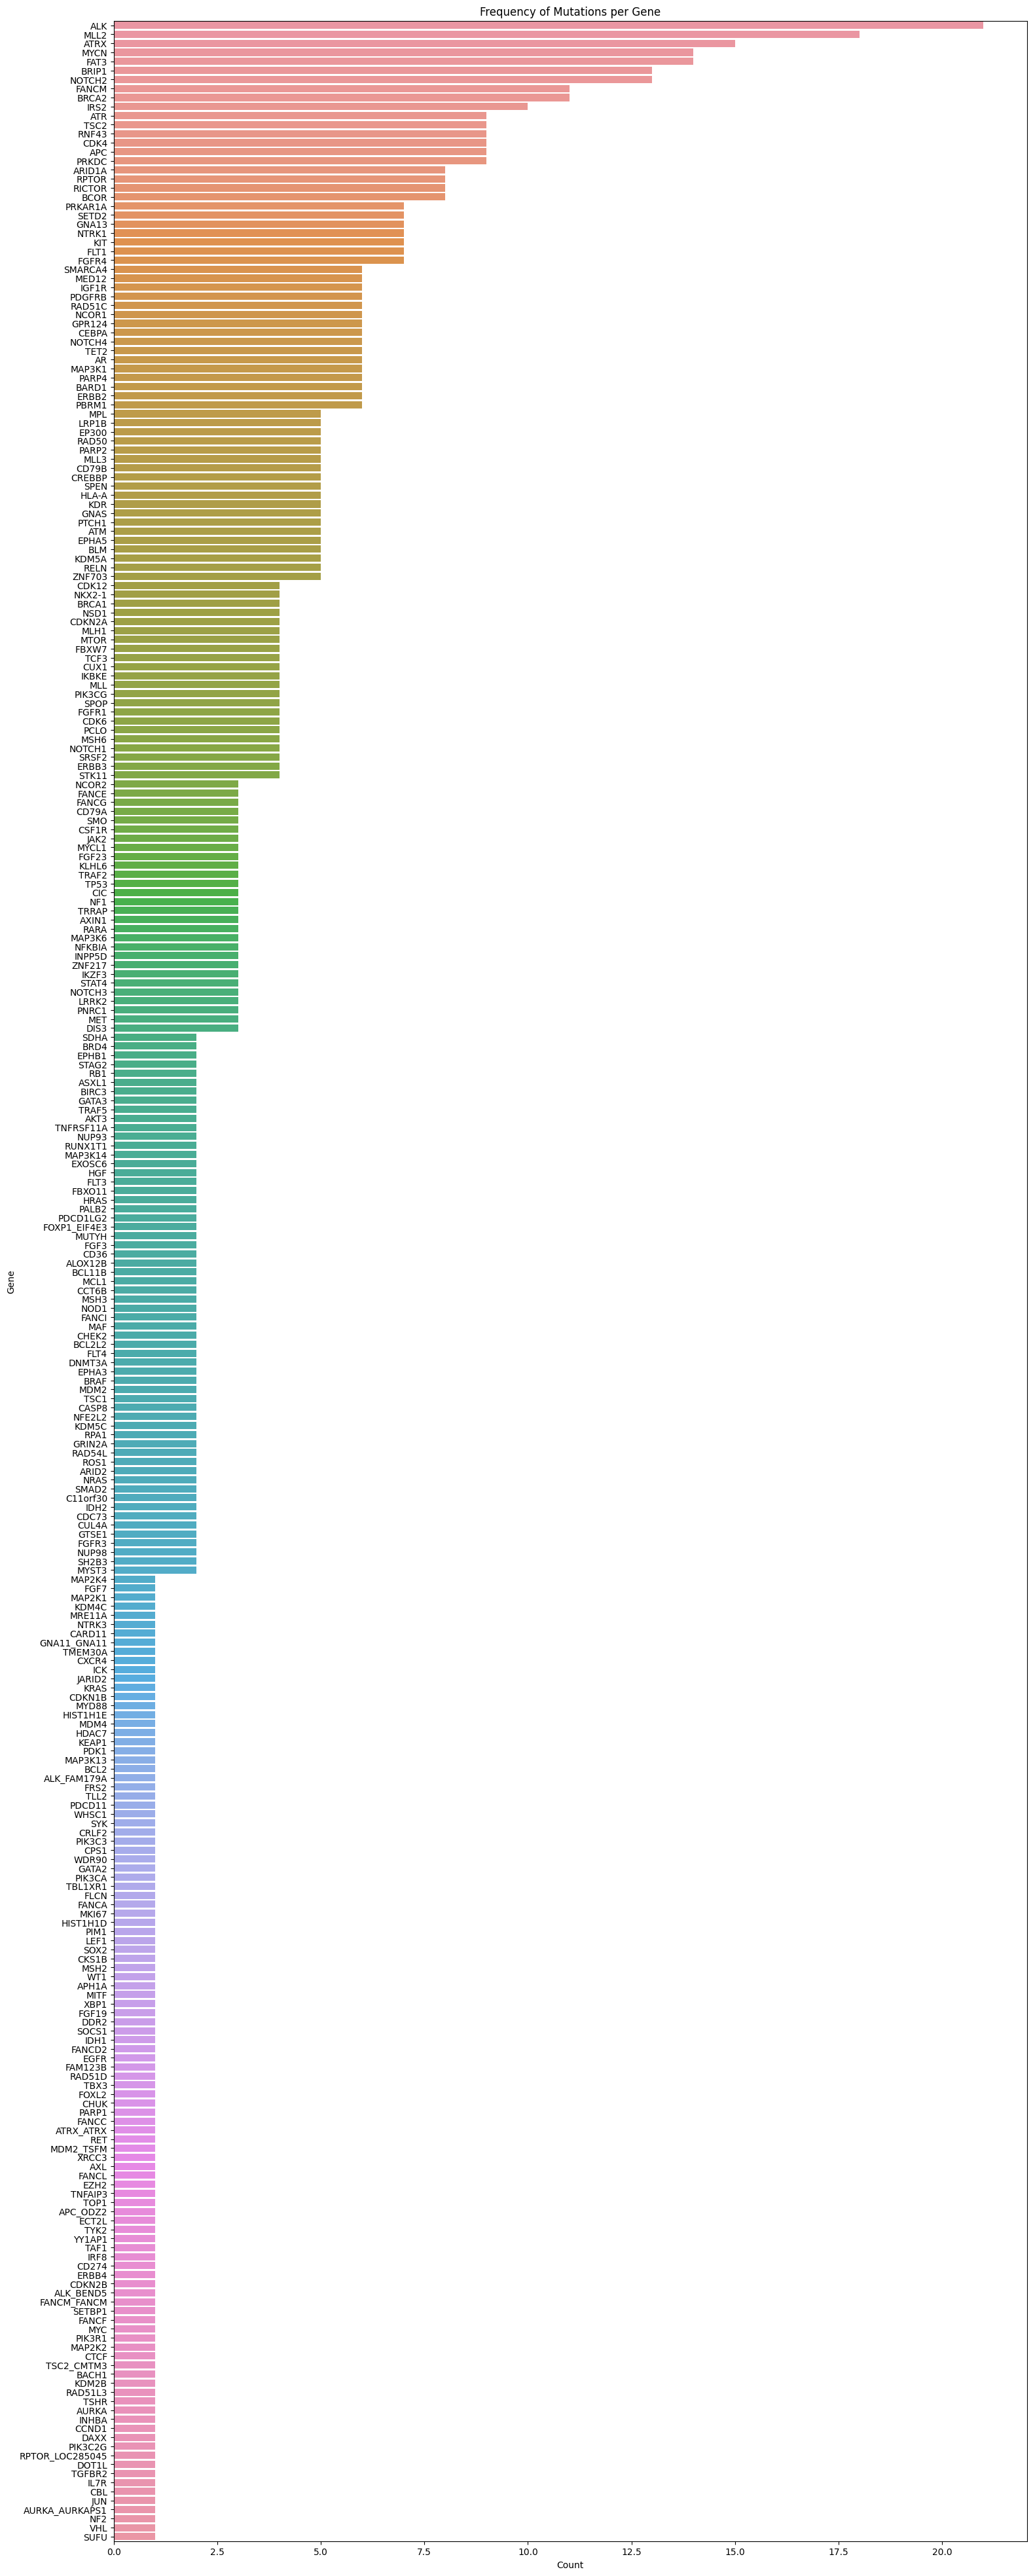

In [25]:
plt.figure(figsize=(18, 50))
sns.countplot(y='Gene', data=df_cleaned, order=df_cleaned['Gene'].value_counts().index)
plt.title('Frequency of Mutations per Gene')
plt.xlabel('Count')
plt.ylabel('Gene')
plt.show()

so basically above is a barplot of the gene along with its frequency of which mutation is occuring in that gene



count of genes is 279
and gene variant counts are like:
ALK:21
meaning 21 is the frequency of mutation obsereved in records of patients

In [28]:
recurrent_mutations = df_cleaned['Gene'].value_counts().head(10)
#top 10 mutable genes in records

In [33]:
df_cleaned['Primary_Relapse'].value_counts()

Primary_Relapse
diagnosis        342
relapse          272
definitive       136
unknown           70
refractory        36
posttreatment      9
Name: count, dtype: int64

In [35]:
print(df_cleaned['Primary_Relapse'])

50      diagnosis
51      diagnosis
52      diagnosis
53      diagnosis
54      diagnosis
          ...    
1410      relapse
1411      relapse
1412      relapse
1413      relapse
1414      relapse
Name: Primary_Relapse, Length: 865, dtype: object


In [36]:
mutation_by_stage = df_cleaned.groupby(['Primary_Relapse', 'Gene']).size().unstack(fill_value=0)

In [37]:
print(mutation_by_stage)

Gene             AKT3  ALK  ALK_BEND5  ALK_FAM179A  ALOX12B  APC  APC_ODZ2  \
Primary_Relapse                                                              
definitive          0    5          0            1        1    5         1   
diagnosis           1    3          0            0        1    3         0   
posttreatment       0    0          0            0        0    0         0   
refractory          0    1          0            0        0    0         0   
relapse             1   10          1            0        0    1         0   
unknown             0    2          0            0        0    0         0   

Gene             APH1A  AR  ARID1A  ...  TYK2  VHL  WDR90  WHSC1  WT1  XBP1  \
Primary_Relapse                     ...                                       
definitive           0   2       0  ...     1    0      0      1    1     0   
diagnosis            0   2       4  ...     0    0      0      0    0     0   
posttreatment        0   0       0  ...     0    0      0  

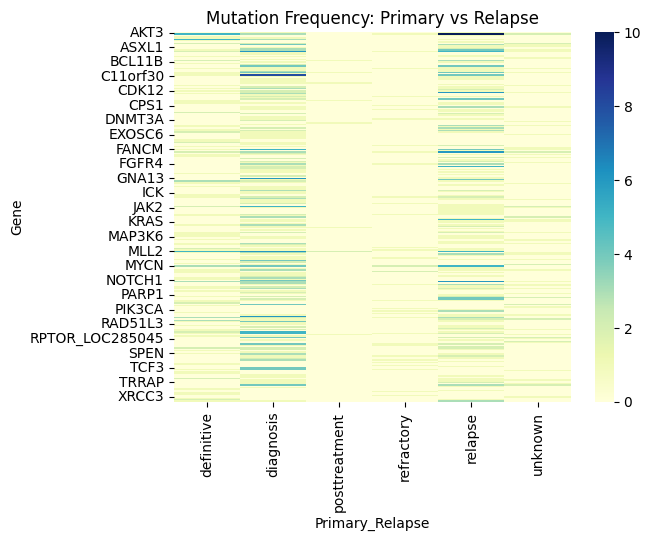

In [38]:
sns.heatmap(mutation_by_stage.T, cmap="YlGnBu")
plt.title('Mutation Frequency: Primary vs Relapse')
plt.show()

In [57]:
df_cleaned['Event.Category'] = df_cleaned['Event.Category'].str.strip().str.lower()

C:\Users\Advaitha\AppData\Local\Temp\ipykernel_1852\253775074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Event.Category'] = df_cleaned['Event.Category'].str.strip().str.lower()


In [60]:

suspected_drivers = df_cleaned[df_cleaned['Event.Category'].str.contains('known|likely', case=False, na=False)]


print(suspected_drivers.head())


    Patient.ID  Sample.ID Primary_Relapse Has.Multiple.Samples Coverage  \
50           2        2.1       diagnosis                  Yes      581   
51           2        2.1       diagnosis                  Yes      581   
52           2        2.1       diagnosis                  Yes      581   
53           2        2.1       diagnosis                  Yes      581   
54           2        2.1       diagnosis                  Yes      581   

            Event.Category                                         Lesion  \
50              known_cnas            CDK4_amplification(11,exons 7 of 7)   
51    known_short_variants     FGFR1:NM_023110:c.1638C>A_p.N546K(0.3,511)   
52  unknown_rearrangements        CDK4_intergenicRegion_rearrangement_200   
53  unknown_short_variants    EPHA5:NM_004439:c.2348G>C_p.G783A(0.69,772)   
54    known_short_variants  ARID1A:NM_006015:c.5849G>A_p.R1950Q(0.52,434)   

      Gene                           Event Age.at.Diagnosis  ...  \
50    CDK4        

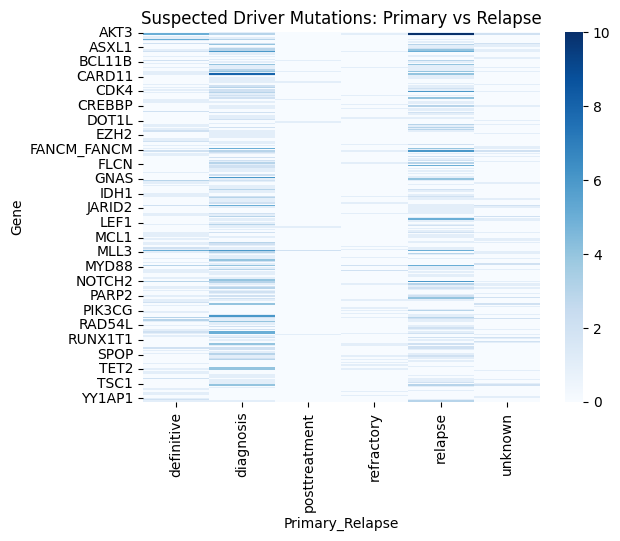

In [62]:
driver_mutations_by_stage = suspected_drivers.groupby(['Primary_Relapse', 'Gene']).size().unstack(fill_value=0)
sns.heatmap(driver_mutations_by_stage.T, cmap="Blues")
plt.title('Suspected Driver Mutations: Primary vs Relapse')
plt.show()